## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics
import pylab
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MDComb = mouse_metadata.merge(study_results, on='Mouse ID', suffixes=(False, False))

# Display the data table for preview
MDComb

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
numMice = len(MDComb['Mouse ID'].unique())
print(numMice)


249


In [3]:
#DF to display multiple results received for a given Mouse's Timepoint
DupMouseTP = MDComb.loc[(MDComb.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)==True)]
DupMouseTP = DupMouseTP.reset_index(drop=True)
DupMouseTP

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Droping Mice with conflicting results; Full DF with Timepoint results
consCheck = MDComb['Mouse ID'].isin(DupMouseTP['Mouse ID'])
MDComb.drop(MDComb[consCheck].index, inplace = True)
MDComb = MDComb.reset_index(drop=True)
MDComb

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Number of mice in cleaned set.
numMiceFinal = len(MDComb['Mouse ID'].unique())
print(numMiceFinal)


248


## Summary Statistics

In [6]:
# Calculating Mean, Median, Mode, Var, STD, and SEM by Mice's Drug Weight.
MDbyDrug = MDComb.groupby(['Drug Regimen'])
MDbyDrugMean = MDbyDrug['Tumor Volume (mm3)'].mean().round(2)
MDbyDrugMed = MDbyDrug['Tumor Volume (mm3)'].median().round(2)
MDbyDrugVar = MDbyDrug['Tumor Volume (mm3)'].var().round(2)
MDbyDrugSTD = MDbyDrug['Tumor Volume (mm3)'].std().round(2)
MDbyDrugSEM = MDbyDrug['Tumor Volume (mm3)'].sem().round(2)
#Displaying calcs in a chart.
DrugWeightAnalysis = pd.DataFrame({"Mean":MDbyDrugMean, "Median":MDbyDrugMed, "Variance":MDbyDrugVar, "Standard Deviation":MDbyDrugSTD, "SEM":MDbyDrugSEM})
DrugWeightAnalysis

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

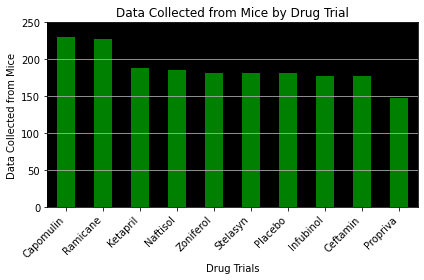

In [13]:
#Grabing Count
DataColByDrug = MDComb["Drug Regimen"].value_counts()
#Graphing with pandas
DataColByDrug.plot(kind="bar", facecolor="green")
#Labels
plt.title("Data Collected from Mice by Drug Trial")
plt.xlabel("Drug Trials")
plt.ylabel("Data Collected from Mice")
#Style Ticks
xVal = np.arange(len(DataColByDrug.index))
plt.xticks(xVal, rotation=45, ha='right')
#Style Graph
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.set_ylim([0,250])
plt.tight_layout()

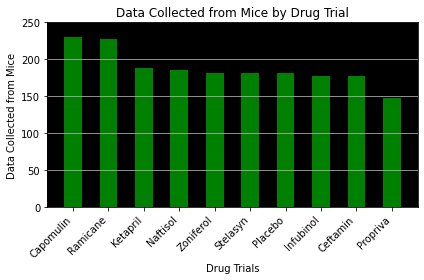

In [14]:
#Graphing with PyPlot
plt.bar(DataColByDrug.index, DataColByDrug.values, width=.5, color='green')
#Labels
plt.title("Data Collected from Mice by Drug Trial")
plt.xlabel("Drug Trials")
plt.ylabel("Data Collected from Mice")
#Style Ticks
xVal = np.arange(len(DataColByDrug.index))
plt.xticks(xVal, rotation=45, ha='right')
#Style Graph
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.set_ylim([0,250])
plt.tight_layout()

Text(0, 0.5, '')

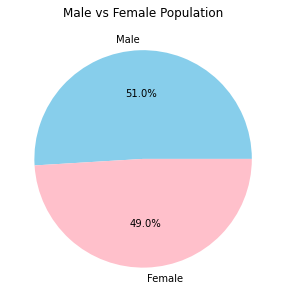

In [15]:
#Pie Chart Graphing with pandas
colors=['skyblue','pink']
DataColBySex = MDComb["Sex"].value_counts()
PandasPieChart = DataColBySex.plot.pie(y='values',figsize=(5, 5),autopct='%1.1f%%', shadow=False, startangle=0, colors=colors)
pylab.title("Male vs Female Population")
pylab.ylabel('')

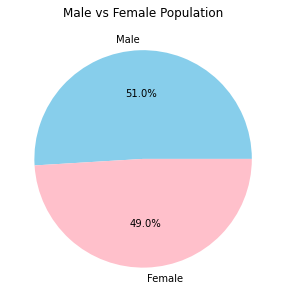

In [16]:
#Pie Chart Graphing with pyplot
fig = plt.pie(DataColBySex.values, labels=DataColBySex.index, autopct="%1.1f%%", shadow=False, startangle=0, colors=colors)
plt.gcf().set_size_inches(5, 5)
plt.title("Male vs Female Population")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
#Last Time Point Recorded for Each Mouse under the selected studies.
#Sort 
MDCombSorted = MDComb.sort_values("Timepoint", ascending=False)
#Keep Highest Val
MDCombSorted = MDCombSorted.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=False, ignore_index=False)
MDCombSorted = MDCombSorted.reset_index(drop=True)
#Seperate DF for Studies
MDCombCapomulin = MDCombSorted.loc[(MDCombSorted['Drug Regimen']=='Capomulin')]
MDCombRamicane = MDCombSorted.loc[(MDCombSorted['Drug Regimen']=='Ramicane')]
MDCombInfubinol = MDCombSorted.loc[(MDCombSorted['Drug Regimen']=='Infubinol')]
MDCombCeftamin = MDCombSorted.loc[(MDCombSorted['Drug Regimen']=='Ceftamin')]
#Reset Indexes
MDCombCapomulin = MDCombCapomulin.reset_index(drop=True)
MDCombRamicane = MDCombRamicane.reset_index(drop=True)
MDCombInfubinol = MDCombInfubinol.reset_index(drop=True)
MDCombCeftamin = MDCombCeftamin.reset_index(drop=True)
#Combine
MainStudiesDF = pd.DataFrame({"Capomulin": MDCombCapomulin['Tumor Volume (mm3)'], "Ramicane": MDCombRamicane['Tumor Volume (mm3)'], "Infubinol": MDCombInfubinol['Tumor Volume (mm3)'], "Ceftamin": MDCombCeftamin['Tumor Volume (mm3)']})
MainStudiesDF.head()


,Capomulin,Ramicane,Infubinol,Ceftamin
0,40.159220,38.407618,62.435404,64.729837
1,31.896238,31.095335,60.918767,61.433892
2,40.658124,40.667713,62.754451,61.386660
3,32.377357,40.659006,66.196912,61.849023
4,38.125164,31.560470,67.685569,67.748662


In [18]:
#Defining Lists of Calculations to Display for Each Study
StudyName =[]
MedquartilesList = []
lowerqList = []
upperqList = []
iqrList = []
lowerBoundList = []
upperBoundList = []
numUpper = []
numLower = []

#Iterating Accross Columns of MainStudiesDF
for (columnName, columnDate) in MainStudiesDF.iteritems():

    #Calculations
    quartiles = MainStudiesDF[columnName].quantile([.25,.5,.75]).round(4)
    lowerq = quartiles[0.25].round(4)
    upperq = quartiles[0.75].round(4)
    iqr = (upperq-lowerq).round(4)
    lower_bound = lowerq-(1.5*iqr).round(4)
    upper_bound = upperq+(1.5*iqr).round(4)
    countUpper = len(MainStudiesDF.loc[MainStudiesDF[columnName]>upper_bound])
    countLower = len(MainStudiesDF.loc[MainStudiesDF[columnName]<lower_bound])

    #Writing to Lists
    StudyName.append(columnName)
    MedquartilesList.append(quartiles[0.5])
    lowerqList.append(lowerq)
    upperqList.append(upperq)
    iqrList.append(iqr)
    lowerBoundList.append(lower_bound)
    upperBoundList.append(upper_bound)
    numUpper.append(countUpper)
    numLower.append(countLower)

#Displaying Values
QuartileSum = pd.DataFrame({"Study Names": StudyName, "Lower Quartile": lowerqList, "Upper Quartile": upperqList, "IQR": iqrList, "Median Quartile": MedquartilesList, "Upper Outlier Bound": upperBoundList, "Lower Outlier Bound": lowerBoundList, "Upper OutLiers": numUpper, "Lower OutLiers": numLower})
QuartileSum = QuartileSum.set_index("Study Names")
QuartileSum

,Lower Quartile,Upper Quartile,IQR,Median Quartile,Upper Outlier Bound,Lower Outlier Bound,Upper OutLiers,Lower OutLiers
Study Names,,,,,,,,
Capomulin,32.3774,40.1592,7.7818,38.1252,51.8319,20.7047,0,0
Ramicane,31.5605,40.6590,9.0985,36.5617,54.3067,17.9128,0,0
Infubinol,54.0486,65.5257,11.4771,60.1652,82.7413,36.8330,0,1
Ceftamin,48.7221,64.2998,15.5777,59.8520,87.6664,25.3555,0,0


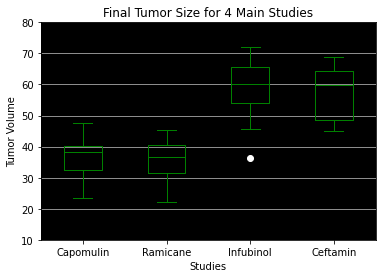

In [19]:
 # box and whisker plot of Final Tumor Size. 
flierprops = dict(marker='o', markerfacecolor='white', markersize=6, linestyle='none', markeredgecolor='white')
ax = MainStudiesDF.plot(kind='box',color=dict(boxes='green', whiskers='green', medians='green', caps='green'),showfliers=True, grid=False, rot=0, flierprops=flierprops)
ax.set_title('Final Tumor Size for 4 Main Studies')
ax.set_xlabel('Studies')
ax.set_ylabel('Tumor Volume')
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.set_ylim([10,80])
plt.show()

## Line and Scatter Plots

Kindly Enter a mouse ID number or enter 'x' to Exit:b128


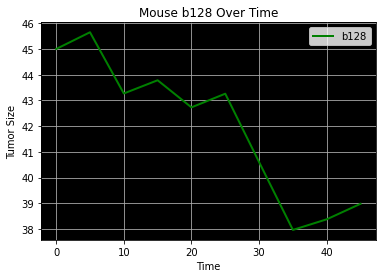

In [22]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#b128 if none are known
#Asking user for mouse ID
check = 0
while check==0:
    MouseID = input("Kindly Enter a mouse ID number or enter 'x' to Exit:")
    if MouseID =='x':
        check=1
    MouseStatus = MDComb.loc[(MDComb['Mouse ID']==MouseID)]
    if (len(MouseStatus)==0)&(MouseID!='x'):
        print('This mouse ID was not found.')
    else:
        check=1
#Plot Once Obtained
MouseLine, = plt.plot(MouseStatus['Timepoint'], MouseStatus['Tumor Volume (mm3)'], color="green", linewidth=2, label=MouseID)
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')
plt.title(f'Mouse {MouseID} Over Time')
plt.xlabel("Time")
plt.ylabel("Tumor Size")
plt.legend(handles=[MouseLine], loc="best")
plt.show()

## Correlation and Regression

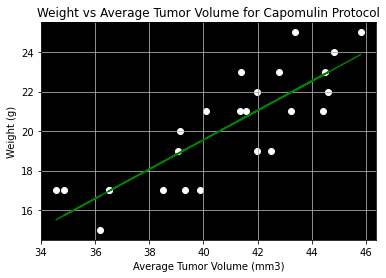

Correlation Coefficient: 0.708721
Linear Regression Line: y = 0.74x + -10.15


In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
MDCapomulin = MDComb.loc[(MDComb['Drug Regimen']=='Capomulin')]
MDCapomulin = MDCapomulin.reset_index(drop=True)
MDCapomulin['Mouse ID1'] = MDCapomulin['Mouse ID']
MDCapomulin = MDCapomulin.set_index("Mouse ID")
MDCapomulin['Average Volume (mm3)'] = MDCapomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().round(2)
MDCapomulin = MDCapomulin.drop_duplicates(subset=['Mouse ID1'], keep='first')

plt.scatter(MDCapomulin['Average Volume (mm3)'],MDCapomulin['Weight (g)'], color='white')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')
slope, intercept, r_value, p_value, std_err = st.linregress(MDCapomulin['Average Volume (mm3)'], MDCapomulin['Weight (g)'])
myLine = slope * MDCapomulin['Average Volume (mm3)'] + intercept
plt.plot(MDCapomulin['Average Volume (mm3)'],myLine,"-",color='green')

plt.title('Weight vs Average Tumor Volume for Capomulin Protocol')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()
print("\033[1mCorrelation Coefficient\033[0m: %f" % r_value**2)
print("\033[1mLinear Regression Line\033[0m: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [ ]:
# Observartions

#1) There appears to be a moderately strong correlation between the weight of the mouse and the size of tumor, which is expected. A large tumor in a small mouse would probably lead to a sooner death as there isn't much left in the mouse to fight back

#2) Capomulin and Ramicane have lower end tumor sizes at the end of the mouses life, which may indicate success, but we would have to compare the initial tumor sizes of the mouse to this end result to be sure.

#3) The sample sets appears to reflect a rather even distribution of male to female set sizes which helps to solidify the effectiveness of a drug across different body compositions.

